In [1]:
# making all necessary imports here
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider, Button
from scipy.io import loadmat
import math
print("Imports done")

# if you have to make any imports, do so here

Imports done


In [2]:
# function to load the 3d model
def load_model(file_path):
    # Load teapot data
    data =loadmat(file_path)
    return data['verts']
    

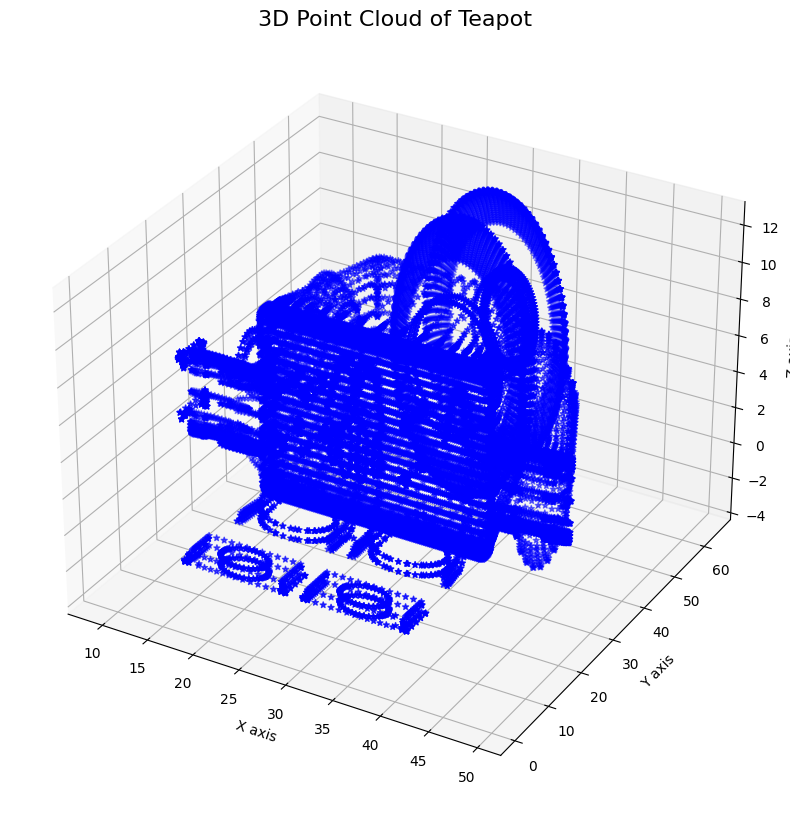

In [3]:
x = load_model('lego_model.mat')
# extracting points(coordinates) from vertices
a = []
b = []
c = []
for points in x:
    # print(points)
    a.append(points[0])
    b.append(points[1])
    c.append(points[2])

# 3D plotting the extracted points
fig = plt.figure(figsize=(12, 10))


ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Point Cloud of Teapot', fontsize=16)

ax.scatter(a,b,c, c='b', marker='*')
# print (len(a))

In [4]:
pts =[]
pts.append(a)
pts.append(b)
pts.append(c)
pts=np.array(pts)
pts=pts.T

In [5]:
def visualize_points(all_projected, all_captions):

    """
    Visualize 2D points for different images with global axis scaling.

    all_projected - list of 2d points for each image (each element is an image)
    all_captions - list of captions for each image
    """
    # Calculate global xlim and ylim for all points
    all_points = np.vstack(all_projected)
    x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
    y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()
    x_pad = (x_max - x_min) * 0.1  # 10% padding
    y_pad = (y_max - y_min) * 0.1
    xlim = [x_min - x_pad, x_max + x_pad]
    ylim = [y_min - y_pad, y_max + y_pad]

    # Plot each focal length in a subplot
    for i, (f, projected) in enumerate(zip(all_captions, all_projected), 1):
        plt.subplot(1, len(all_captions), i)
        plt.scatter(projected[:, 0], projected[:, 1], c='b', marker='.', s=1)
        plt.title(f)
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.grid(True)





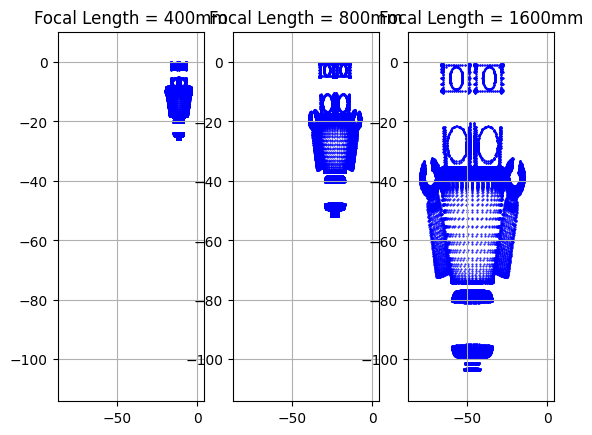

In [6]:
def scenario_1_varying_focal_length(pts):
    """
    Scenario 1: Compare different focal lengths with more dramatic differences.
    
    Args:
    - pts: numpy array of 3D points (N x 3)
    """
    # Define the focal lengths
    focal_lengths = [400, 800, 1600]
    captions = [f'Focal Length = {f}mm' for f in focal_lengths]
    all_projected = []

    # Camera position along the z-axis
    Tz = -1000  # Camera 1000 units away

    for f in focal_lengths:
        # Intrinsic matrix
        K = np.array([
            [f, 0, 0],
            [0, f, 0],
            [0, 0, 1]
        ])

        # Extrinsic matrix (no rotation, just translation along z-axis)
        Rt = np.array([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, Tz]
        ])

        # Projection matrix
        P = K @ Rt

        # Project 3D points to 2D
        pts_homogeneous = np.hstack((pts, np.ones((pts.shape[0], 1))))  # Convert to homogeneous coordinates
        projected_pts_homogeneous = P @ pts_homogeneous.T  # Apply projection
        projected_pts_2D = (projected_pts_homogeneous[:2, :] / projected_pts_homogeneous[2, :]).T  # Normalize by z

        # Store the projected 2D points for visualization
        all_projected.append(projected_pts_2D)

    # Visualize all focal length projections
    visualize_points(all_projected, captions)

# Example usage:
scenario_1_varying_focal_length(pts)


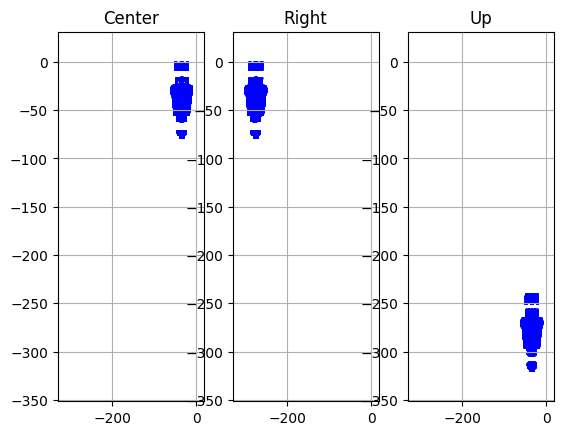

In [7]:

def scenario_2_camera_positions(pts):
    # Define focal length and captions for each camera position
    focal_length = 1200
    camera_positions = {
        'Center': (0, 0, -1000),
        'Right': (200, 0, -1000),
        'Up': (0, 200, -1000)
    }
    captions = list(camera_positions.keys())
    
    # List to hold projected points for each camera position
    all_projected = []
    
    # Loop through each camera position and compute the projection
    for caption, (Tx, Ty, Tz) in camera_positions.items():
        # Define the intrinsic matrix with the fixed focal length
        K = np.array([[focal_length, 0, 0],
                      [0, focal_length, 0],
                      [0, 0, 1]])
        
        # Define the extrinsic matrix based on the camera position
        Rt = np.array([[1, 0, 0, Tx],
                       [0, 1, 0, Ty],
                       [0, 0, 1, Tz]])
        
        # Compute the projection matrix
        P = K @ Rt
        
        # Convert 3D points to homogeneous coordinates
        pts_homogeneous = np.hstack((pts, np.ones((pts.shape[0], 1))))
        
        # Project points to 2D using the projection matrix
        projected_pts_homogeneous = P @ pts_homogeneous.T
        projected_pts_2D = (projected_pts_homogeneous[:2, :] / projected_pts_homogeneous[2, :]).T
        
        # Store the projected 2D points
        all_projected.append(projected_pts_2D)
    
    # Visualize the projections
    visualize_points(all_projected, captions)


scenario_2_camera_positions(pts)


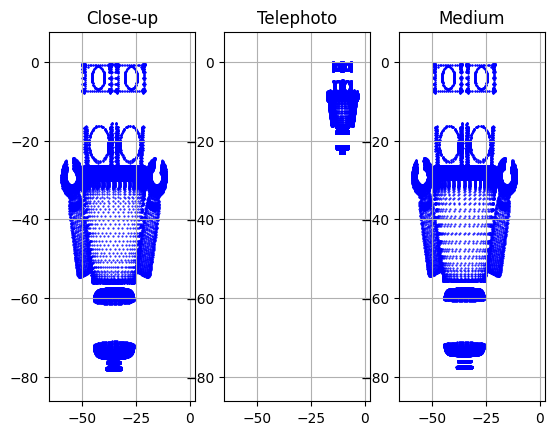

In [8]:

def scenario_3_telephoto_vs_position(pts):
    """
    Scenario 3: Compare telephoto effect vs. camera position with more pronounced differences
    """
    # Define focal lengths and camera distances for each setup
    setups = {
        'Close-up': (600, 0, 0, -500),
        'Telephoto': (1800, 0, 0, -5000),
        'Medium': (1200, 0, 0, -1000)
    }
    captions = list(setups.keys())
    
    # List to hold projected points for each setup
    all_projected = []
    
    # Loop through each setup and compute the projection
    for caption, (focal_length, Tx, Ty, Tz) in setups.items():
        # Define the intrinsic matrix with the specific focal length
        K = np.array([[focal_length, 0, 0],
                      [0, focal_length, 0],
                      [0, 0, 1]])
        
        # Define the extrinsic matrix based on the camera distance
        Rt = np.array([[1, 0, 0, Tx],
                       [0, 1, 0, Ty],
                       [0, 0, 1, Tz]])
        
        # Compute the projection matrix
        P = K @ Rt
        
        # Convert 3D points to homogeneous coordinates
        pts_homogeneous = np.hstack((pts, np.ones((pts.shape[0], 1))))
        
        # Project points to 2D using the projection matrix
        projected_pts_homogeneous = P @ pts_homogeneous.T
        projected_pts_2D = (projected_pts_homogeneous[:2, :] / projected_pts_homogeneous[2, :]).T
        
        # Store the projected 2D points
        all_projected.append(projected_pts_2D)
    
    # Visualize the projections
    visualize_points(all_projected, captions)

    

scenario_3_telephoto_vs_position(pts)

New camera distance for equivalent projection: -500.0


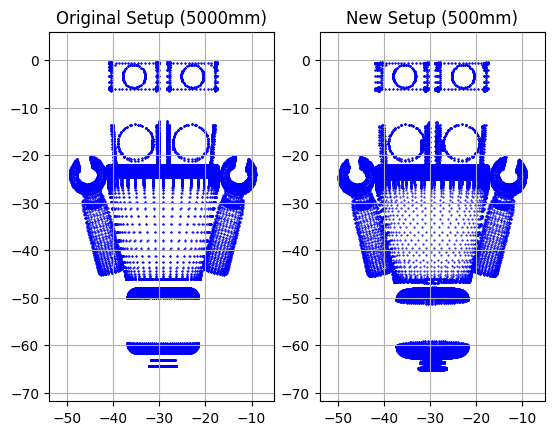

In [11]:
def scenario_4_calculate_translation(pts):
    # Initial setup parameters
    focal_length_initial = 5000
    camera_distance_initial = -5000

    # New setup parameters
    focal_length_new = 500
    camera_distance_new = (camera_distance_initial * focal_length_new) / focal_length_initial

    # Projection matrices for both setups
    # Initial setup
    K_initial = np.array([[focal_length_initial, 0, 0],
                          [0, focal_length_initial, 0],
                          [0, 0, 1]])
    Rt_initial = np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 1, camera_distance_initial]])
    P_initial = K_initial @ Rt_initial

    # New setup with adjusted translation
    K_new = np.array([[focal_length_new, 0, 0],
                      [0, focal_length_new, 0],
                      [0, 0, 1]])
    Rt_new = np.array([[1, 0, 0, 0],
                       [0, 1, 0, 0],
                       [0, 0, 1, camera_distance_new]])
    P_new = K_new @ Rt_new

    # Project points using the initial setup
    pts_homogeneous = np.hstack((pts, np.ones((pts.shape[0], 1))))
    projected_pts_initial = (P_initial @ pts_homogeneous.T)[:2].T / (P_initial @ pts_homogeneous.T)[2].reshape(-1, 1)

    # Project points using the new setup
    projected_pts_new = (P_new @ pts_homogeneous.T)[:2].T / (P_new @ pts_homogeneous.T)[2].reshape(-1, 1)

    # Visualize both projections side-by-side to verify similarity
    visualize_points([projected_pts_initial, projected_pts_new], ['Original Setup (5000mm)', 'New Setup (500mm)'])

    # Print new camera distance for reference
    print(f"New camera distance for equivalent projection: {camera_distance_new}")


scenario_4_calculate_translation(pts)




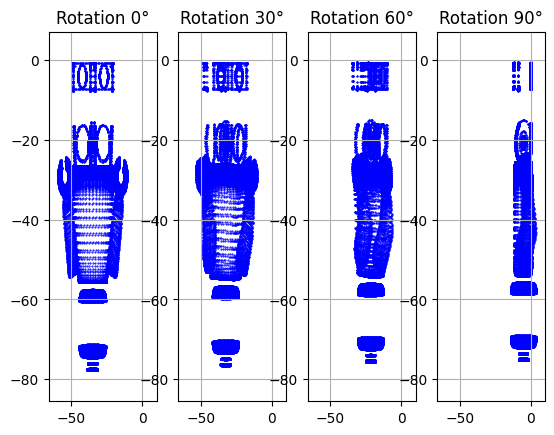

In [12]:

def scenario_5_varying_rotation(pts):
    # Fixed focal length and camera distance
    focal_length = 1200
    camera_distance = -1000

    # Rotation angles around the Y-axis in degrees
    angles = [0, 30, 60, 90]
    
    # Projection matrix components
    K = np.array([[focal_length, 0, 0],
                  [0, focal_length, 0],
                  [0, 0, 1]])
    
    projected_points_list = []
    titles = []
    
    for angle in angles:
        # Convert angle to radians for rotation matrix calculation
        theta = np.radians(angle)
        
        # Rotation matrix around the Y-axis
        R = np.array([
            [np.cos(theta), 0, np.sin(theta), 0],
            [0, 1, 0, 0],
            [-np.sin(theta), 0, np.cos(theta), camera_distance]
        ])
        
        # Projection matrix
        P = K @ R
        
        # Project the points using the current rotation
        pts_homogeneous = np.hstack((pts, np.ones((pts.shape[0], 1))))
        projected_pts = (P @ pts_homogeneous.T)[:2].T / (P @ pts_homogeneous.T)[2].reshape(-1, 1)
        
        # Store the projected points for visualization
        projected_points_list.append(projected_pts)
        titles.append(f"Rotation {angle}°")
    
    # Visualize projections
    visualize_points(projected_points_list, titles)

scenario_5_varying_rotation(pts)


*Reflections:*

0°: Offers a direct, head-on view.
30° and 60°: Show progressively more of the side of the LEGO figure, altering the perspective and perceived depth.
90°: Results in a side view, where depth perception is diminished, and the figure appears “flatter.”

